In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# ETAPE 1

## IMPORTATION DES DONNES EXCEL

In [60]:
df= pd.read_excel('data/ONLINE_RETAILS.xlsx')

In [62]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [63]:
len(data)

541909

## Réorganisation du format de date

In [64]:
df.InvoiceDate.tail()

541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, dtype: datetime64[ns]

In [65]:
df['InvoiceDate'] = pd.to_datetime(fichier['InvoiceDate'])

In [66]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## PREPROCESSING
##### - Prise de connaissance des données afin de faire une analyse descriptive et tirer des conclusions par rapport à la problématique 





In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [68]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


[4, 2, 1, 1]

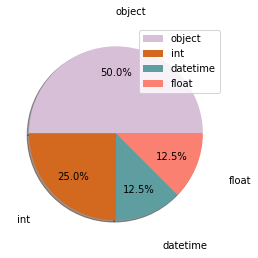

In [97]:
plt.figure(figsize = (4, 4))
x = list(df.dtypes.value_counts())
plt.pie(x, labels = ['object', 'int', 'datetime', 'float'],
           colors = ['Thistle', 'Chocolate', 'CadetBlue','Salmon'],
           autopct = lambda x: str(round(x, 1)) + '%',
           pctdistance = 0.7, labeldistance = 1.4,
           shadow = True)
plt.legend()


### Verification des valeurs Nulls



<AxesSubplot:>

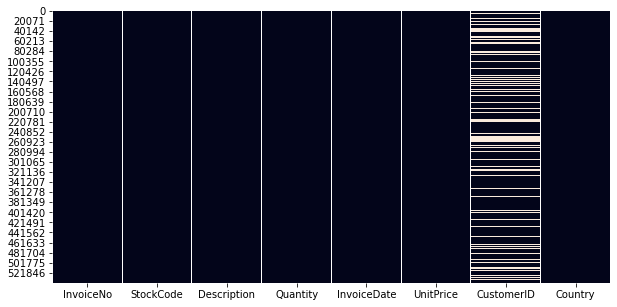

In [99]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar=False)

   #### conclusion: 
   - D'après l'image ci-dessus nous constatons que la colonne CustomerID est la seul a posseder des valeurs null.

In [100]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

InvoiceNo      0.000000
StockCode      0.000000
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
Country        0.000000
Description    0.002683
CustomerID     0.249267
dtype: float64

In [101]:
df = df.set_index('InvoiceDate')

In [103]:
df.index

DatetimeIndex(['2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:28:00',
               '2010-12-01 08:28:00', '2010-12-01 08:34:00',
               ...
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=541909, freq=None)

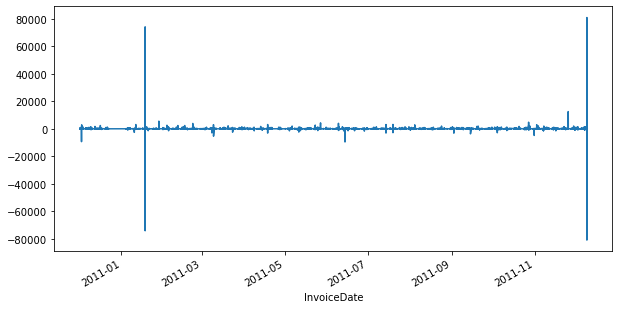

In [112]:
df['Quantity'].plot(figsize=(10, 5))
plt.show()

#### On n'observe pas concrètement de tendance . 
   - Procédons maintenant à une analsye plus détaillée afin de déceler d'éventuelles saisonnalités.

df.loc['2010', 'Quantity'].resample('W').mean().plot()
plt.show()

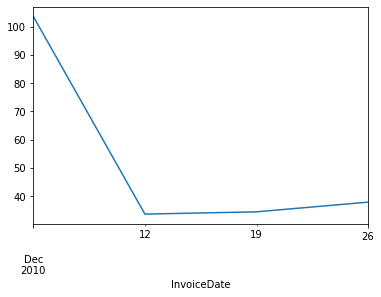

In [117]:
df.loc['2010', 'Quantity'].resample('W').std().plot()
plt.show()

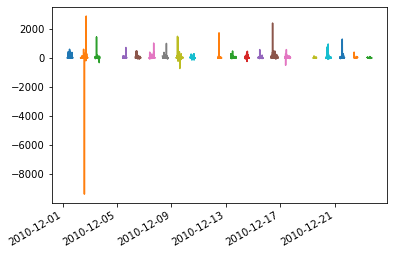

In [115]:
df.loc['2010', 'Quantity'].resample('D').plot()
plt.show()

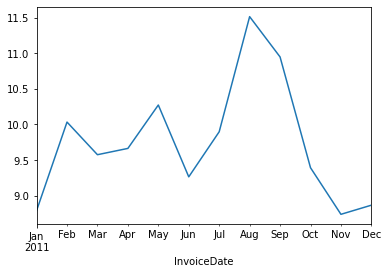

In [116]:
df.loc['2011', 'Quantity'].resample('M').mean().plot()
plt.show()

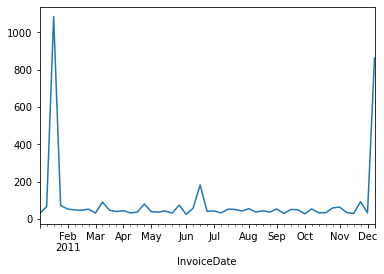

In [109]:
df.loc['2011', 'Quantity'].resample('W').std().plot()
plt.show()

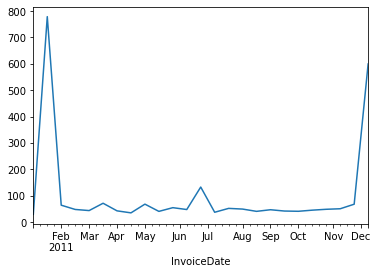

In [110]:
df.loc['2011', 'Quantity'].resample('2W').std().plot()
plt.show()

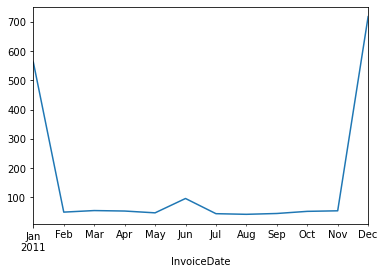

In [118]:
df.loc['2011', 'Quantity'].resample('M').std().plot()
plt.show()

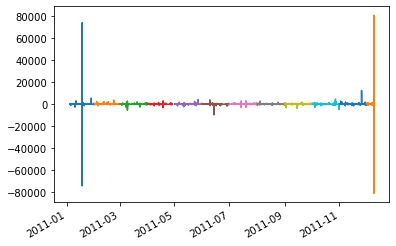

In [119]:
df.loc['2011', 'Quantity'].resample('M').plot()
plt.show()

#### - Conclusion: 
    - On constate qu'en analysant les données de 2010 et 2011 par semaine ou par mois , on observe qu'il y'a
    bien des varaiations.

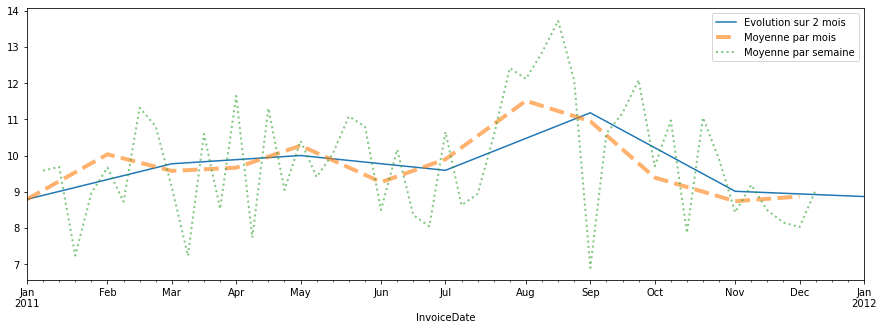

In [134]:
plt.figure(figsize=(15, 5))
df.loc['2011', 'Quantity'].resample('2M').mean().plot(label='Evolution sur 2 mois')
df.loc['2011', 'Quantity'].resample('M').mean().plot(label='Moyenne par mois', lw=4, ls='--', alpha=0.6)
df.loc['2011', 'Quantity'].resample('W').mean().plot(label='Moyenne par semaine', lw=2, ls=':', alpha=0.6)
plt.legend()
plt.show()

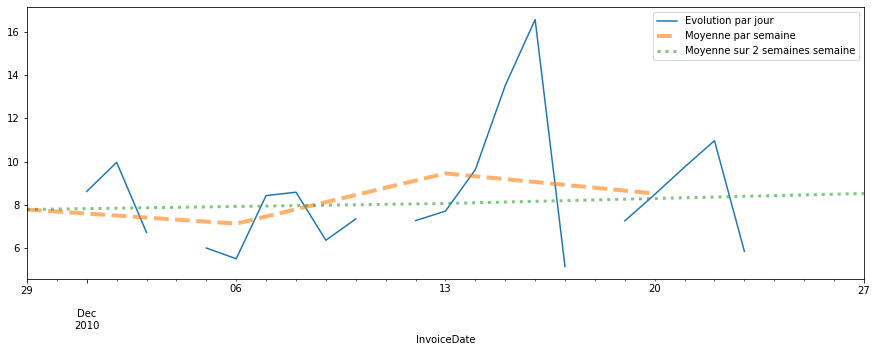

In [140]:
plt.figure(figsize=(15, 5))
df.loc['2010', 'Quantity'].resample('D').mean().plot(label='Evolution par jour')
df.loc['2010', 'Quantity'].resample('W').mean().plot(label='Moyenne par semaine', lw=4, ls='--', alpha=0.6)
df.loc['2010', 'Quantity'].resample('2W').mean().plot(label='Moyenne sur 2 semaines semaine', lw=3, ls=':', alpha=0.6)
plt.legend()
plt.show()

#### Analyse de la variable 'UnitPrice'

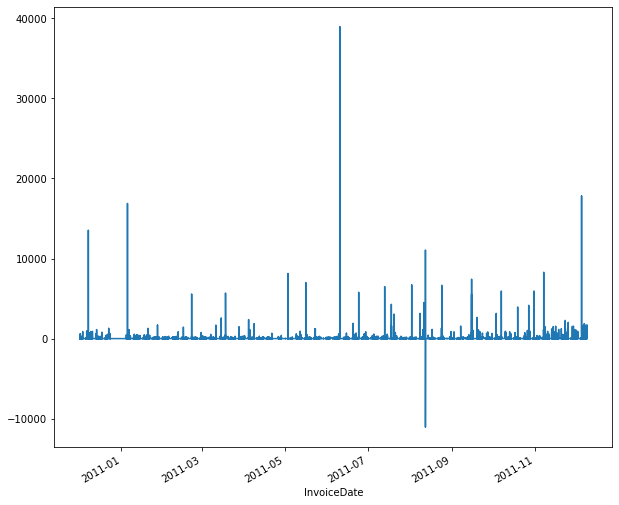

In [156]:
df['UnitPrice'].plot(figsize=(10,9))
plt.show()

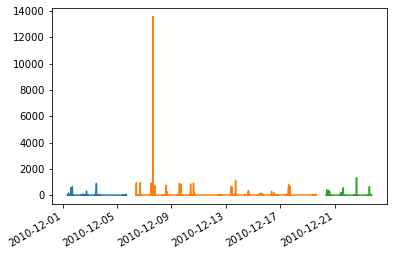

In [157]:
df.loc['2010', 'UnitPrice'].resample('2W').plot()
plt.show()

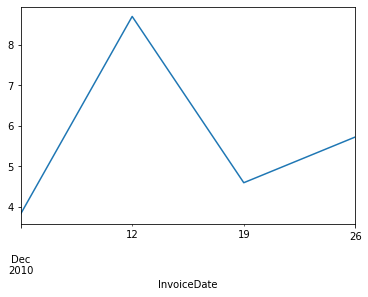

In [153]:
df.loc['2010', 'UnitPrice'].resample('W').mean().plot()
plt.show()

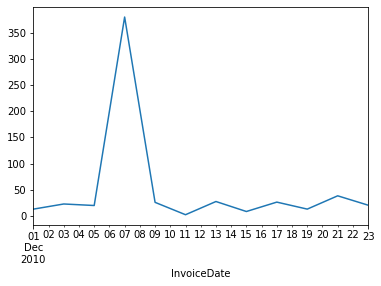

In [155]:
df.loc['2010', 'UnitPrice'].resample('2D').std().plot()
plt.show()

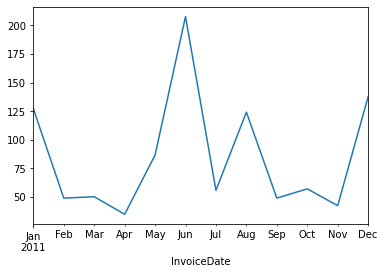

In [158]:
df.loc['2011', 'UnitPrice'].resample('M').std().plot()
plt.show()

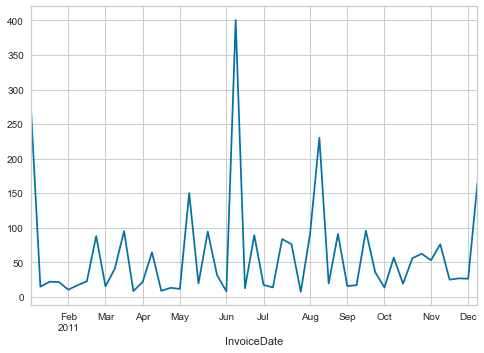

In [629]:
df.loc['2011', 'UnitPrice'].resample('W').std().plot()
plt.show()

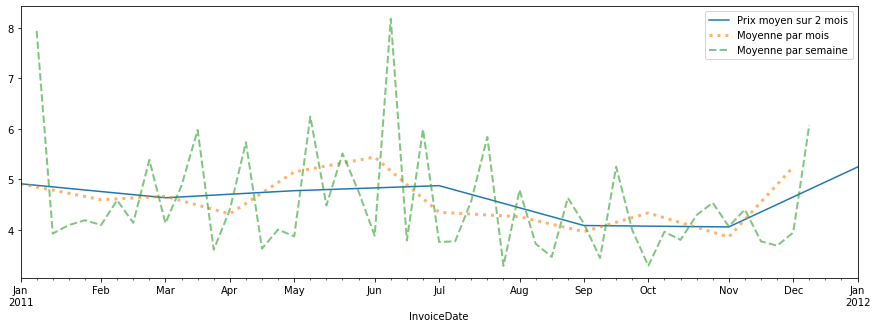

In [159]:
plt.figure(figsize=(15, 5))
df.loc['2011', 'UnitPrice'].resample('2M').mean().plot(label='Prix moyen sur 2 mois')
df.loc['2011', 'UnitPrice'].resample('M').mean().plot(label='Moyenne par mois', lw=3, ls=':', alpha=0.6)
df.loc['2011', 'UnitPrice'].resample('W').mean().plot(label='Moyenne par semaine', lw=2, ls='--', alpha=0.6)
plt.legend()
plt.show()

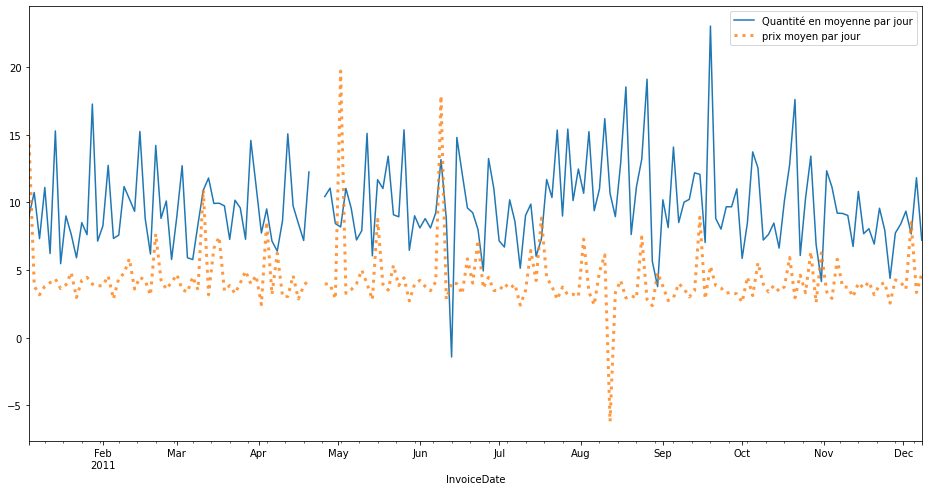

In [162]:
plt.figure(figsize=(16, 8))
df.loc['2011', 'Quantity'].resample('2D').mean().plot(label='Quantité en moyenne par jour')
df.loc['2011', 'UnitPrice'].resample('2D').mean().plot(label='prix moyen par jour', lw=3, ls=':', alpha=0.8)
#df.loc['2011', 'Quantity'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

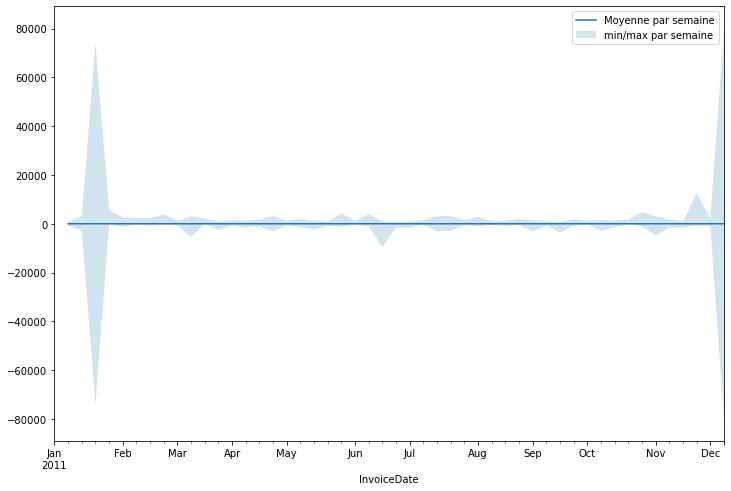

In [166]:
Price = df['UnitPrice'].resample('W').agg(['mean', 'std', 'min', 'max'])

plt.figure(figsize=(12, 8))
Price['mean']['2011'].plot(label='Moyenne par semaine')
plt.fill_between(prix.index, prix['max'], prix['min'], alpha=0.2, label='min/max par semaine')

plt.legend()
plt.show()

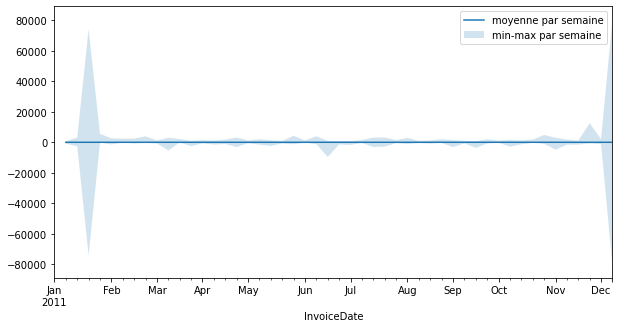

In [165]:
Price = df['Quantity'].resample('W').agg(['mean', 'std', 'min', 'max'])

plt.figure(figsize=(10, 5))
Price['mean']['2011'].plot(label='moyenne par semaine')
plt.fill_between(prix.index, Price['max'], prix['min'], alpha=0.2, label='min-max par semaine')

plt.legend()
plt.show()

<AxesSubplot:xlabel='InvoiceDate'>

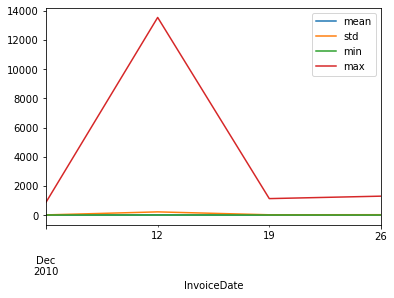

In [167]:
df.loc['2010', 'UnitPrice'].resample('W').agg(['mean', 'std', 'min', 'max']).plot()

<AxesSubplot:xlabel='InvoiceDate'>

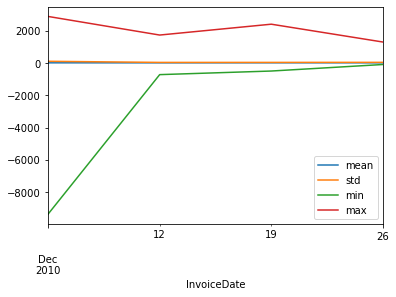

In [168]:
df.loc['2010', 'Quantity'].resample('W').agg(['mean', 'std', 'min', 'max']).plot()


array([<AxesSubplot:xlabel='InvoiceDate'>,
       <AxesSubplot:xlabel='InvoiceDate'>], dtype=object)

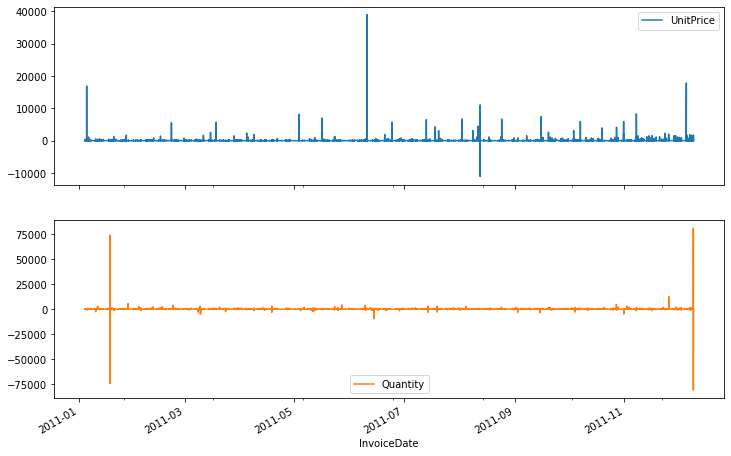

In [169]:
df[['UnitPrice', 'Quantity']]['2011'].plot(subplots=True, figsize=(12, 8))

### Variables Quantitatives

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


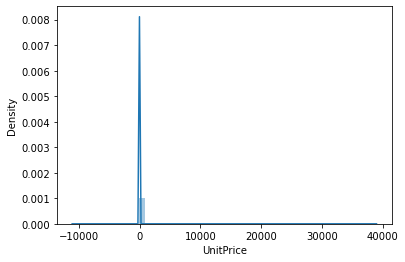

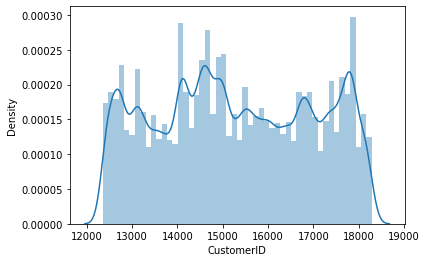

In [170]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

### Variables Qualitatives

In [171]:
for col in data.select_dtypes('object'):
    print(f'{col :-<50} {data[col].unique()}')

InvoiceNo----------------------------------------- [536365 536366 536367 ... 581585 581586 581587]
StockCode----------------------------------------- ['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]
Description--------------------------------------- ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Country------------------------------------------- ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [643]:
dff = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
dff.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [185]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


---

# NETOYAGE DES DONNEES 

    - Nous allons suprimer les lignes possédant données manqauntes e utilisant : 
        data_clean.dropna(inplace=True)
        
    - Ensuite nous vérifirons les résulat grâce à :
        data_clean.isna().sum()

In [231]:
data_new = data.copy()

In [232]:
data_new = df[df['Quantity'] > 0]

In [233]:
data_new.isna().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
UnitPrice           0
CustomerID     133361
Country             0
dtype: int64

In [234]:
def clean_data_new (data):
    data = data.reset_index()
    print('longueure début :', len(data))
    data['Annee'] = data['InvoiceDate'].dt.year
    data['Mois'] = data['InvoiceDate'].dt.month
    data['Jour'] = data['InvoiceDate'].dt.day
    data.dropna(inplace=True)
    data = data.drop_duplicates()
    data = data[~(data.CustomerID.isnull())]
    print('longueure finale:', len(data))
    return data

data_new = clean_data_new(data_new)

longueure début : 531285
longueure finale: 392732


In [235]:
data_new.head(6)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Annee,Mois,Jour
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010,12,1
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010,12,1
2,2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010,12,1
3,2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010,12,1
4,2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010,12,1
5,2010-12-01 08:26:00,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,17850.0,United Kingdom,2010,12,1


In [236]:
data_new['Depense'] = data_new.Quantity * data_new.UnitPrice

In [237]:
data_new.tail(6)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Annee,Mois,Jour,Depense
531279,2011-12-09 12:50:00,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,4.15,12680.0,France,2011,12,9,16.60
531280,2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011,12,9,10.20
531281,2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011,12,9,12.60
531282,2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011,12,9,16.60
531283,2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011,12,9,16.60
531284,2011-12-09 12:50:00,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680.0,France,2011,12,9,14.85


# I. QUESTIONS (10 points)

## 1. Volume. 


In [238]:
# Lors d’une dépense, combien de produits un client achète-t-il généralement?
Q1 = data_new.groupby(['CustomerID']).agg({'Quantity':'sum'})

In [239]:
Q1 = Q1.reset_index()
Q1.head()

,CustomerID,Quantity
0,12346.0,74215
1,12347.0,2458
2,12348.0,2341
3,12349.0,631
4,12350.0,197


In [240]:
Nb_prodits = Q1.mean()
print("Le nombre de produits moyen qu'un client achète en générale est de:",Nb_prodits.Quantity.round(3))

Le nombre de produits moyen qu'un client achète en générale est de: 1190.571


### Distribution associée.

<AxesSubplot:xlabel='Quantity', ylabel='Count'>

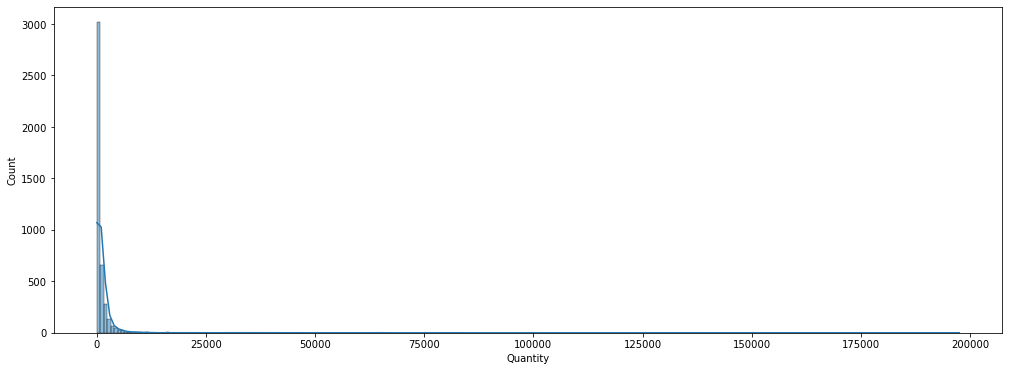

In [241]:
plt.figure(figsize=(17,6))
sns.histplot(data=Q1, x="Quantity", kde=True, bins=250)

###  Nombre moyen et médian des produits acheté  par pays

In [242]:
data_new.groupby(['Country'])[['Country','Quantity']].head()

,Country,Quantity
0,United Kingdom,6
1,United Kingdom,6
2,United Kingdom,8
3,United Kingdom,6
4,United Kingdom,6
...,...,...
387013,RSA,8
387014,RSA,8
387015,RSA,6
387016,RSA,10


###  RESULTAT : Nombre moyen 

In [243]:
Nb_moyen = data_new.rename(columns={'Quantity' :'Quantité moyenne de produits acheter par pays'})
Nb_moyen = Nb_moyen.groupby(['Country'])
Nb_moyen = Nb_moyen.agg({'Quantité moyenne de produits acheter par pays':'mean'})
Nb_moyen

,Quantité moyenne de produits acheter par pays
Country,
Australia,71.114020
Austria,12.263819
Bahrain,15.294118
Belgium,11.441162
Brazil,11.125000
Canada,18.298013
Channel Islands,12.697456
Cyprus,10.514096
Czech Republic,26.840000


--- 

### RESULTAT : Nombre median 

In [244]:
Nb_median = data_new.rename(columns={'Quantity' :'Quentité median des produits achete par pays'})
Nb_median = Nb_median.groupby(['Country'])
Nb_median = Nb_median.agg({'Quentité median des produits achete par pays':'median'})
Nb_median

,Quentité median des produits achete par pays
Country,
Australia,32
Austria,10
Bahrain,6
Belgium,10
Brazil,10
Canada,12
Channel Islands,10
Cyprus,6
Czech Republic,24


---

In [245]:
Vol= df.groupby(['CustomerID']).agg({'Quantity':'count'}).reset_index()

In [246]:
Vol.mean()

CustomerID    15299.677722
Quantity         93.053294
dtype: float64

In [247]:
Vol[Vol['CustomerID'] == 12347.0]

,CustomerID,Quantity
1,12347.0,182


In [248]:
Vol.Quantity.mean()

93.05329368709972

In [249]:
Vol[Vol['CustomerID'] == 12346.0]

,CustomerID,Quantity
0,12346.0,2


In [250]:
data_new.head(4)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Annee,Mois,Jour,Depense
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010,12,1,15.30
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010,12,1,20.34
2,2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010,12,1,22.00
3,2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010,12,1,20.34


## 2. Montant. 


In [252]:
prod_client = data_new.groupby(['CustomerID']).agg({'StockCode':'count'}).reset_index()
prod_client

,CustomerID,StockCode
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,721


In [253]:
print("En moyenne, un client achete: ", np.mean(prod_client['StockCode']), "articles")

En moyenne, un client achete:  90.51209956211109 articles


### Distribution associée

<AxesSubplot:xlabel='StockCode', ylabel='Count'>

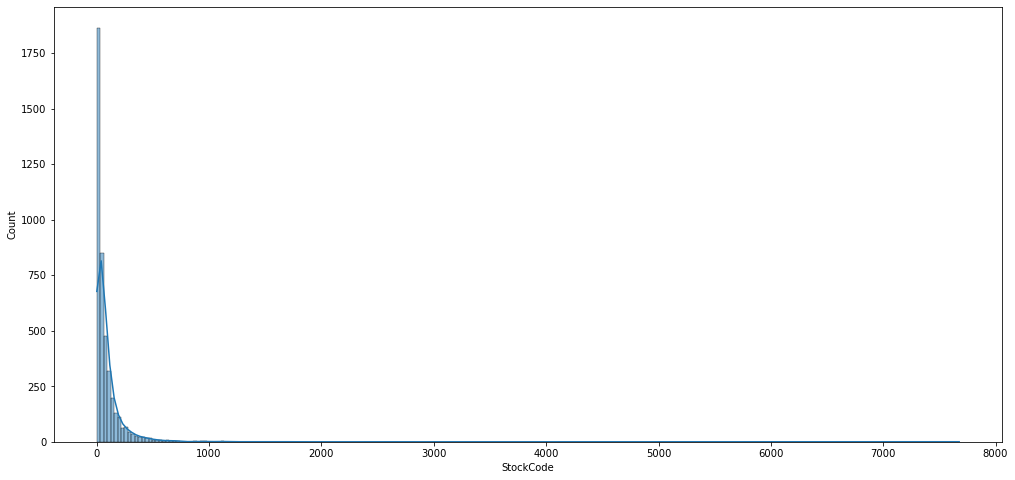

In [255]:
plt.figure(figsize=(17,8))
sns.histplot(data=prod_client, x="StockCode", kde=True, bins=250)

### Nombre moyen de produits acheté par pays

In [258]:
total_achat_moyen = data_new.rename(columns={'Depense' :'Montant moyen des achats par pays'})
total_achat_moyen = total_achat_moyen.groupby(['Country'])
total_achat_moyen = total_achat_moyen.agg({'Montant moyen des achats par pays':'mean'})
total_achat_moyen

,Montant moyen des achats par pays
Country,
Australia,116.937340
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.363507
Cyprus,22.392786
Czech Republic,33.069600


### Nombre médian des produits acheté par pays

In [259]:
total_achat_median = data_new.rename(columns={'Depense' :'Montant moyen des achats par pays'})
total_achat_median = total_achat_median.groupby(['Country'])
total_achat_median = total_achat_median.agg({'Montant moyen des achats par pays':'median'})
total_achat_median

,Montant moyen des achats par pays
Country,
Australia,66.00
Austria,17.17
Bahrain,25.50
Belgium,16.60
Brazil,19.65
Canada,16.50
Channel Islands,17.70
Cyprus,16.50
Czech Republic,31.20


#### Montant moyen d’un panier client par pays.



In [261]:
total_price_mean = data_new.groupby(['Country']).agg({'Depense':'mean'})
total_price_mean.head(5)

,Depense
Country,
Australia,116.937340
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500


#### Montant médian d’un panier client par pays.



In [265]:
total_price_median = data_new.groupby(['Country']).agg({'Depense':'median'})
total_price_median.head(5)

,Depense
Country,
Australia,66.00
Austria,17.17
Bahrain,25.50
Belgium,16.60
Brazil,19.65


### Représentation graphique 

<AxesSubplot:xlabel='StockCode', ylabel='Count'>

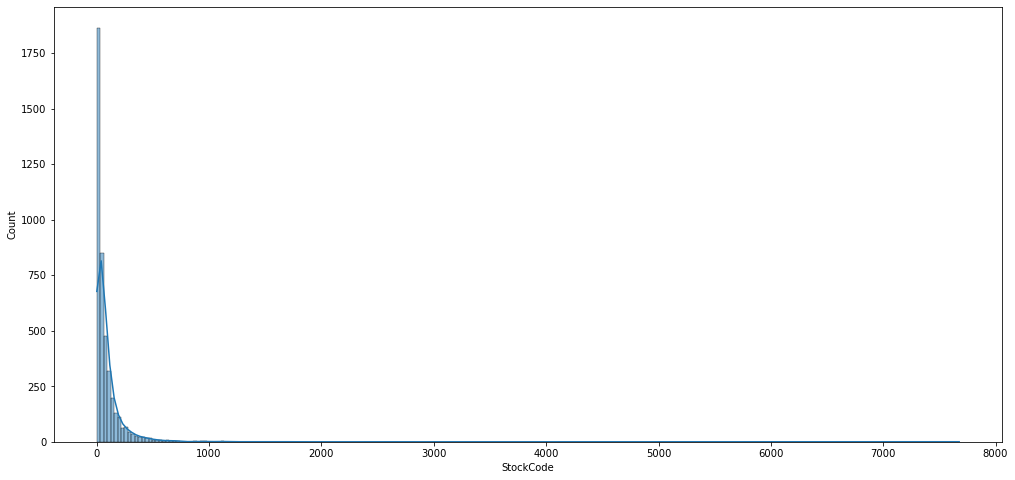

In [268]:
plt.figure(figsize=(17,8))
sns.histplot(data=prod_client, x="StockCode", kde=True, bins=250)

# 3. Volume. 



#### A) Quels sont les top-5 produits les plus vendus durant le premier trimestre 2011 ?

In [269]:
data_trim = data_new.copy()

In [270]:
data_trim.head(5)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Annee,Mois,Jour,Depense
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010,12,1,15.30
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010,12,1,20.34
2,2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010,12,1,22.00
3,2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010,12,1,20.34
4,2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010,12,1,20.34


In [272]:
data_new.Mois.unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [278]:
partie1 = (data_new['Annee']==2011) 
partie1 = data_new[partie1]

In [279]:
Mask.head(5)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Annee,Mois,Jour,Depense
41683,2011-01-04 10:00:00,539993,22386,JUMBO BAG PINK POLKADOT,10,1.95,13313.0,United Kingdom,2011,1,4,19.5
41684,2011-01-04 10:00:00,539993,21499,BLUE POLKADOT WRAP,25,0.42,13313.0,United Kingdom,2011,1,4,10.5
41685,2011-01-04 10:00:00,539993,21498,RED RETROSPOT WRAP,25,0.42,13313.0,United Kingdom,2011,1,4,10.5
41686,2011-01-04 10:00:00,539993,22379,RECYCLING BAG RETROSPOT,5,2.10,13313.0,United Kingdom,2011,1,4,10.5
41687,2011-01-04 10:00:00,539993,20718,RED RETROSPOT SHOPPER BAG,10,1.25,13313.0,United Kingdom,2011,1,4,12.5


In [280]:
partie1.Mois.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

#### B) Pendant le second trimestre 2011 ?

In [281]:
partie2 = (partie1['Mois'].between(1,3))

In [283]:
data_trim = partie1[partie2]

In [284]:
data_trim.tail()

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Annee,Mois,Jour,Depense
139127,2011-03-31 19:54:00,548548,22423,REGENCY CAKESTAND 3 TIER,1,12.75,17781.0,United Kingdom,2011,3,31,12.75
139128,2011-03-31 19:54:00,548548,21361,LOVE LARGE WOOD LETTERS,7,12.75,17781.0,United Kingdom,2011,3,31,89.25
139129,2011-03-31 19:55:00,548549,84763,ZINC FINISH 15CM PLANTER POTS,100,1.06,16365.0,United Kingdom,2011,3,31,106.00
139130,2011-03-31 19:55:00,548549,22222,CAKE PLATE LOVEBIRD WHITE,1,4.95,16365.0,United Kingdom,2011,3,31,4.95
139131,2011-03-31 19:55:00,548549,22776,SWEETHEART CAKESTAND 3 TIER,1,9.95,16365.0,United Kingdom,2011,3,31,9.95


In [285]:
data_trim.Mois.unique()

array([1, 2, 3])

# 4. Volume. 
- Les 5 pays qui ont générés le plus gros chiffre d’affaire pendant le premier trimestre 2011 

In [286]:
data_trim['Depense'].groupby(data_trim['Country']).agg('sum').sort_values(ascending = False).head(5)

Country
United Kingdom    1261278.72
Netherlands         72039.56
EIRE                53690.07
Australia           40937.12
Germany             40854.58
Name: Depense, dtype: float64

# 5. Volume

#### Graphe de l’évolution mensuelle du montant moyen d’un panier client pour 5 pays 

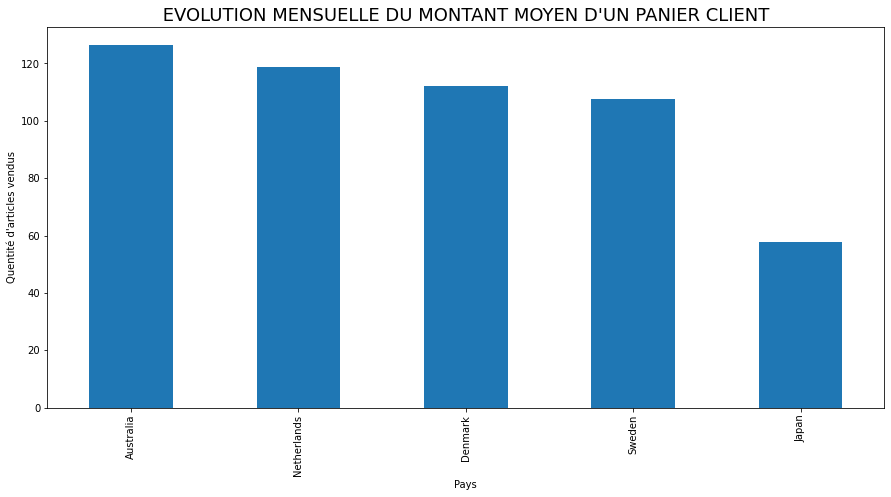

In [287]:
data_trim['Depense'].groupby(data_trim['Country']).agg('mean').sort_values(ascending = False).head(5).plot.bar(figsize = (15, 7))

plt.title(" EVOLUTION MENSUELLE DU MONTANT MOYEN D'UN PANIER CLIENT ", fontsize = 18)
plt.xlabel('Pays')
plt.ylabel("Quentité d'articles vendus")
plt.show()

#### Montant. Tracez l’évolution mensuelle du montant médian d’un panier client pour chacun de ces cinq pays.

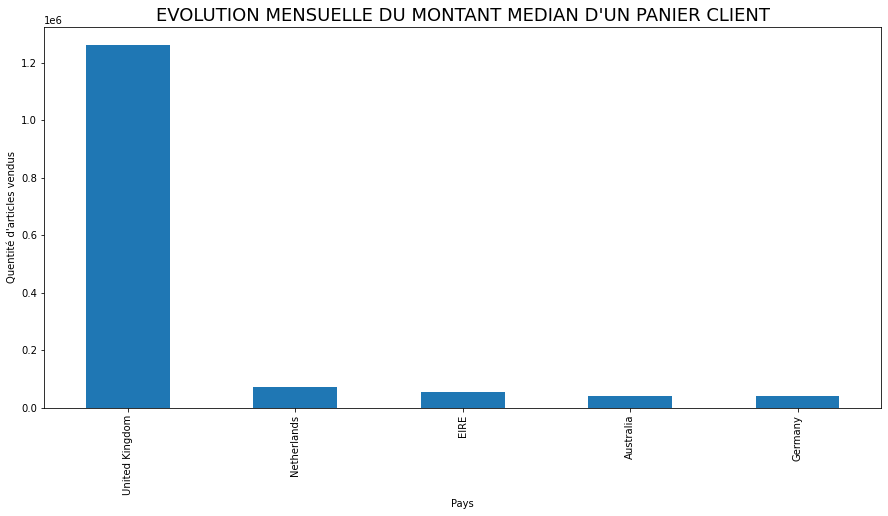

In [289]:
data_trim['Depense'].groupby(data_trim['Country']).agg('sum').sort_values(ascending = False).head(5).plot.bar(figsize = (15, 7))

plt.title("EVOLUTION MENSUELLE DU MONTANT MEDIAN D'UN PANIER CLIENT", fontsize = 18)
plt.xlabel('Pays')
plt.ylabel("Quentité d'articles vendus")
plt.show()

# 2. Volume.
- quelle est la fréquence de dépensent des 100 plus gros clients du Royaume-Uni ?

In [315]:
import datetime

In [316]:
data_freq = data_new.copy()

In [318]:
ref = data_freq.InvoiceDate.max()
ref = ref + datetime.timedelta(days = 1)

In [319]:
ref

Timestamp('2011-12-10 12:50:00')

In [309]:
data_freq['dernier_achat'] = ref - data_freq.InvoiceDate
data_freq['num_dernier_achat'] = data_freq['dernier_achat'].astype('timedelta64[D]')

In [312]:
data_freq.head(4)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Annee,Mois,Jour,Depense,dernier_achat,num_dernier_achat
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010,12,1,15.30,374 days 04:24:00,374.0
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010,12,1,20.34,374 days 04:24:00,374.0
2,2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010,12,1,22.00,374 days 04:24:00,374.0
3,2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010,12,1,20.34,374 days 04:24:00,374.0


In [ ]:
historiq = data_freq.groupby("CustomerID").min().reset_index()[['CustomerID', 'num_dernier_achat']]
historiq.rename(columns={'dernier_achat':'Achat_recent'}, inplace=True)
historiq.Achat_recent.describe()

In [ ]:
client_history = data_frequence.groupby("CustomerID").min().reset_index()[['CustomerID', 'num_jours_depuis_le_dernier_achat']]
client_history.rename(columns={'num_jours_depuis_le_dernier_achat':'Achat_recent'}, inplace=True)
client_history.Achat_recent.describe()

In [714]:
val = data_frequence[['CustomerID', 'Depense']].groupby("CustomerID").sum().reset_index()
client_history = client_history.merge(val, how='outer')
client_history.Depense = client_history.Depense+0.001
client_frequence = data_frequence[['CustomerID', 'Depense']].groupby("CustomerID").count().reset_index()
client_frequence.rename(columns={'Depense':'frequency'},inplace=True)
client_history = client_history.merge(client_frequence, how='outer')

In [715]:
client_history

,CustomerID,Achat_recent,Depense,frequency
0,12346.0,326.0,77183.601,1
1,12347.0,2.0,4310.001,182
2,12348.0,75.0,1797.241,31
3,12349.0,19.0,1757.551,73
4,12350.0,310.0,334.401,17
...,...,...,...,...
4334,18280.0,278.0,180.601,10
4335,18281.0,181.0,80.821,7
4336,18282.0,8.0,178.051,12
4337,18283.0,4.0,2045.531,721


#### Fréquence. A quelle fréquence dépensent les 100 plus gros clients du Royaume-Uni ?

In [716]:
client_history['Pays'] = data_frequence.Country

In [717]:
client_history.head()

,CustomerID,Achat_recent,Depense,frequency,Pays
0,12346.0,326.0,77183.601,1,United Kingdom
1,12347.0,2.0,4310.001,182,United Kingdom
2,12348.0,75.0,1797.241,31,United Kingdom
3,12349.0,19.0,1757.551,73,United Kingdom
4,12350.0,310.0,334.401,17,United Kingdom


In [718]:
united_kingdom = client_history[client_history['Pays'] == 'United Kingdom'].sort_values(by=['Depense'], ascending=False)
united_kingdom

,CustomerID,Achat_recent,Depense,frequency,Pays
4202,18102.0,1.0,259657.301,431,United Kingdom
3729,17450.0,8.0,194390.791,336,United Kingdom
55,12415.0,24.0,124914.531,716,United Kingdom
1334,14156.0,10.0,117210.081,1395,United Kingdom
3772,17511.0,3.0,91062.381,963,United Kingdom
...,...,...,...,...,...
723,13307.0,120.0,15.001,1,United Kingdom
3961,17763.0,263.0,15.001,1,United Kingdom
3324,16878.0,84.0,13.301,3,United Kingdom
3218,16738.0,298.0,3.751,1,United Kingdom


In [719]:
united_kingdom = united_kingdom.head(100)
united_kingdom

,CustomerID,Achat_recent,Depense,frequency,Pays
4202,18102.0,1.0,259657.301,431,United Kingdom
3729,17450.0,8.0,194390.791,336,United Kingdom
55,12415.0,24.0,124914.531,716,United Kingdom
1334,14156.0,10.0,117210.081,1395,United Kingdom
3772,17511.0,3.0,91062.381,963,United Kingdom
...,...,...,...,...,...
4207,18109.0,2.0,8004.921,441,United Kingdom
66,12428.0,26.0,7956.461,294,United Kingdom
2163,15290.0,5.0,7943.221,204,United Kingdom
334,12757.0,16.0,7834.651,364,United Kingdom


In [720]:
frequence_depensent = united_kingdom.frequency.mean()
frequence_depensent

504.57

In [721]:
display("Les 100 plus gros clients du Royaume-Uni dépensent a une fréquence de {} % ".format(frequence_depensent))

'Les 100 plus gros clients du Royaume-Uni dépensent a une fréquence de 504.57 % '

--- 

## II. Modèles (10 points)

#### 1. Quel sera le chiffre d’affaire global de la société en Décembre 2011 ?

In [722]:
Msk = (data_clean['Annee']==2011) #& (data_clean['Mois'].between(1,3))
Msk = data_clean[Msk]

In [723]:
Mask2 = (Msk[Msk['Mois'] == 12 ])

In [724]:
Mask2.head(3)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,weekday,Annee,Mois,Jour,Depense
506150,2011-12-01 08:33:00,579899,23301,GARDENERS KNEELING PAD KEEP CALM,24,1.65,15687.0,United Kingdom,Thursday,2011,12,1,39.60
506151,2011-12-01 08:33:00,579899,22623,BOX OF VINTAGE JIGSAW BLOCKS,3,5.95,15687.0,United Kingdom,Thursday,2011,12,1,17.85
506152,2011-12-01 08:33:00,579899,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,4,3.75,15687.0,United Kingdom,Thursday,2011,12,1,15.00


In [725]:
Mask2.groupby(['Country']).agg({'Depense':'median'})

,Depense
Country,
Austria,142.80
Belgium,14.61
Channel Islands,30.00
Denmark,13.50
EIRE,16.50
Finland,41.60
France,16.80
Germany,17.34
Greece,16.50


In [726]:
Mask2.Country.unique()

array(['United Kingdom', 'Germany', 'EIRE', 'France', 'Finland',
       'Belgium', 'Portugal', 'USA', 'Channel Islands', 'Norway',
       'Sweden', 'Denmark', 'Italy', 'Greece', 'Spain', 'Netherlands',
       'Iceland', 'Austria'], dtype=object)

In [727]:
united_kingdom_2 = Mask2[Mask2['Country'] == 'United Kingdom']
united_kingdom_2.head(2)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,weekday,Annee,Mois,Jour,Depense
506150,2011-12-01 08:33:00,579899,23301,GARDENERS KNEELING PAD KEEP CALM,24,1.65,15687.0,United Kingdom,Thursday,2011,12,1,39.60
506151,2011-12-01 08:33:00,579899,22623,BOX OF VINTAGE JIGSAW BLOCKS,3,5.95,15687.0,United Kingdom,Thursday,2011,12,1,17.85


In [728]:
united_kingdom_2.Country.unique()

array(['United Kingdom'], dtype=object)

In [730]:
ca = united_kingdom_2.Depense.sum()

In [731]:
print("le chiffre d’affaire global de la société en Décembre 2011 est de {} euro".format(ca))

le chiffre d’affaire global de la société en Décembre 2011 est de 471381.82 euro


#### 2. Combien de clients vont réaliser au moins un achat en Décembre 2011 en France ?

In [535]:
data_clean.head(2)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,weekday,Annee,Mois,Jour,Depense,jours_depuis_le_dernier_achat,num_jours_depuis_le_dernier_achat
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,15.30,374 days 04:24:00,374.0
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,20.34,374 days 04:24:00,374.0


##### Pour conforter votre réponse, vous indiquerez la performance de votre modèle sur une période de test antérieur, e.g., Novembre 2011.

# DATA PREPARATION

In [536]:
def get_new_df(dataframe):
    dataframe.dropna(inplace=True)
    dataframe = dataframe[~dataframe["InvoiceNo"].str.contains("C",na=False)]
    dataframe = dataframe[~(dataframe["Description"] == "POSTAGE")]
    dataframe["TotalPrice"] = dataframe["Quantity"] * dataframe["UnitPrice"]
    return dataframe

df = get_new_df(data_clean)

In [542]:
df.head(3)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,weekday,Annee,Mois,Jour,Depense,jours_depuis_le_dernier_achat,num_jours_depuis_le_dernier_achat,TotalPrice
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,15.30,374 days 04:24:00,374.0,15.30
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,20.34,374 days 04:24:00,374.0,20.34
2,2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,22.00,374 days 04:24:00,374.0,22.00


In [544]:
def get_rfm():
    today_date = dt.datetime(2011, 12, 11)
    rfm = df.groupby("CustomerID").agg({"InvoiceDate": lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                         "InvoiceNo": lambda Invoice: Invoice.nunique(),
                                         "TotalPrice": lambda TotalPrice: TotalPrice.sum()})
    rfm.columns = ["recency", "frequency", "monetary"]
    rfm = rfm[(rfm['monetary'] > 0)]
    return rfm
rfm = get_rfm()

In [545]:
rfm.head(10)

,recency,frequency,monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1437.24
12349.0,19,1,1457.55
12350.0,311,1,294.40
12352.0,37,8,2226.04
12353.0,205,1,89.00
12354.0,233,1,1079.40
12355.0,215,1,459.40


## Standardization

In [560]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [561]:
#!pip install --user yellowbrick

In [562]:
sc = MinMaxScaler((0, 1))
rfm = sc.fit_transform(rfm)

rfm[0:10]

array([[8.71313673e-01, 0.00000000e+00, 2.76497221e-01],
       [5.36193029e-03, 2.87081340e-02, 1.54271634e-02],
       [2.01072386e-01, 1.43540670e-02, 5.13548551e-03],
       [4.82573727e-02, 0.00000000e+00, 5.20824620e-03],
       [8.31099196e-01, 0.00000000e+00, 1.04125516e-03],
       [9.65147453e-02, 3.34928230e-02, 7.96136569e-03],
       [5.46916890e-01, 0.00000000e+00, 3.05408576e-04],
       [6.21983914e-01, 0.00000000e+00, 3.85352182e-03],
       [5.73726542e-01, 0.00000000e+00, 1.63236854e-03],
       [5.89812332e-02, 9.56937799e-03, 8.89779675e-03]])

## Clustering avec K-Means

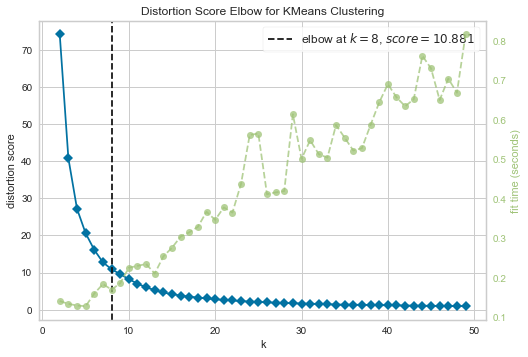

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [563]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 50))
elbow.fit(rfm)
elbow.show()

In [564]:
elbow.elbow_value_

8

## IMPLEMENTATION

In [565]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(rfm)
clusters = kmeans.labels_

rfm = get_rfm()

rfm["cluster_no"] = clusters
rfm["cluster_no"] = rfm["cluster_no"] + 1

rfm.head(10)

,recency,frequency,monetary,cluster_no
CustomerID,,,,
12346.0,326,1,77183.60,4
12347.0,3,7,4310.00,7
12348.0,76,4,1437.24,3
12349.0,19,1,1457.55,7
12350.0,311,1,294.40,4
12352.0,37,8,2226.04,1
12353.0,205,1,89.00,5
12354.0,233,1,1079.40,2
12355.0,215,1,459.40,5
